# Assignment 2

Nima : time spent = 10

Kailash: time spent = 10 

## Task 1

Find a linear regression model that relates the living area to the selling price. If you did any data cleaning step(s), describe and explain why you did that.  

Decisions

#1 We will look for NaN/null values, by printing the boolean value. If false, there is no NaN values as we will need to handle them if they exist.

#2 Second, we will start with plotting a scatter plot and the regression line to identify outliers, e.g houses with an abnormal low price given their living area relatively to other houses.

False
False


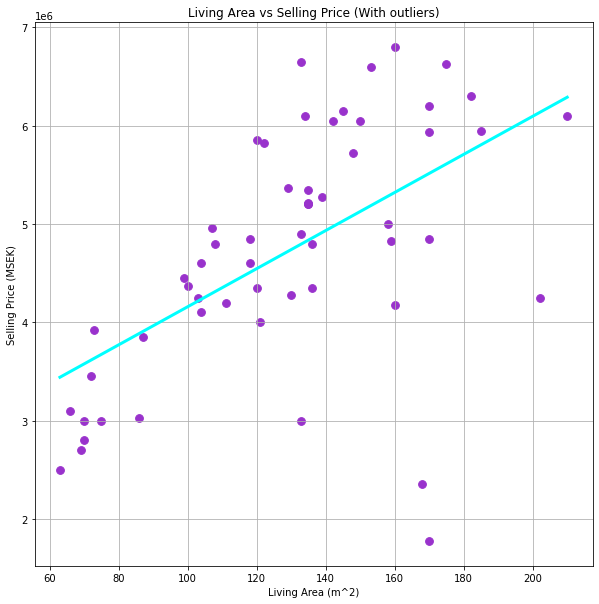

In [ ]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Importing the data a dataframes from an csv-file
df = pd.read_csv("/work/data_assignment2.csv")

#Check for null values
print(df['Living_area'].isnull().values.any())
print(df['Selling_price'].isnull().values.any())

#removing the unnecessary columns
df = df[['ID','Living_area','Selling_price']]

#Choosing my x and y data --> x as the living area and y as the selling price
#As we assume that living area impacts selling price and not the other way around
x = (df['Living_area'])
y = (df['Selling_price'])

#Converting to a numpy array as we recieved a FutureWarning
x = np.asarray(x)

#Creating the linear regression model, 
model = LinearRegression().fit(x[:, np.newaxis], y)

#plot the regression line
#1000 evenly spaced points in the intervall [living area min, living area max].
xfit_1 = np.linspace(x.min(), x.max(), 1000) 
yfit_1 = model.predict(xfit_1[:, np.newaxis])

plt.figure(figsize=(10, 10))
plt.scatter(x, y, s=60 , color='darkorchid')
plt.plot(xfit_1, yfit_1, color='cyan',linewidth=3)
plt.title('Living Area vs Selling Price (With outliers)')
plt.xlabel('Living Area (m^2)')
plt.ylabel('Selling Price (MSEK)')
plt.grid('true')
plt.show()


We can see some outliers e.g in the bottom right, that has an to low price given their living area relatively to other houses. Therefore we do not believe that they are representative of the population and that the accuracy of the regression could improve if we remove those outliers and base our new model on our cleaned data, without outliers. Which we believe is important as the task is about predicting house prices based on their living area.

Decisions

As we spotted some outliers, we will clean our data by removing all data points laying above/below a set distance from the linear regression line (we will set the boundaries using (k*x+m) +- (acceptable distance). The acceptable distance will be based on what we view as an abnormal distance when looking at the first graph. We decided to put 1.7 million as an acceptable distans by trying from 1 million --> 1.7 million and comparing the plot to our earlier plot, we want to have a value as high as possible to only remove the ones that looks as outliers.

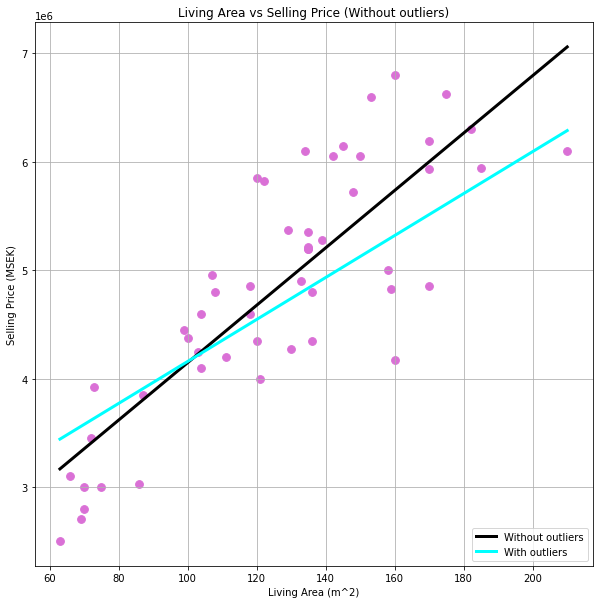

In [ ]:
# sanity check? (resonera kring att första linjen är god nog för att använda sig av +/- y-idst.)

#Removing the outliers
m = model.intercept_
k = model.coef_[0]

#setting an acceptable distance
Acceptable_distance = 1700000
#Setting two boundaris that based on the old line
Boundary_High = df['Living_area'] * k + m + Acceptable_distance
Boundary_Low = df['Living_area'] * k + m - Acceptable_distance

df = df.loc[df['Selling_price'].between(Boundary_Low, Boundary_High)]

#Choosing my x and y data as before
x = (df['Living_area'])
y = (df['Selling_price'])

#Converting to a numpy array
x = np.asarray(x)

#Creating the linear regression model trained on the cleaned data
model = LinearRegression().fit(x[:, np.newaxis], y)


#1000 evenly spaced points in the intervall [living area min, living area max].
xfit = np.linspace(x.min(), x.max(), 1000)

#predicting the y values 
yfit = model.predict(xfit[:, np.newaxis])

#plotting and styling the regression line and the datapoints
plt.figure(figsize=(10, 10))
plt.scatter(x, y, s=60 , color='orchid')
plt.plot(xfit, yfit, color='black',linewidth=3, label = "Without outliers")
plt.plot(xfit_1, yfit_1, color='cyan',linewidth=3, label = "With outliers")
plt.title('Living Area vs Selling Price (Without outliers)')
plt.xlabel('Living Area (m^2)')
plt.ylabel('Selling Price (MSEK)')
plt.legend(loc = "lower right")
plt.grid('true')
plt.show()



### Answer a)

Answer 1a) We looked for null values but fortunately did not find any, if we would have, we would have had to remove these rows containing null values or estimating a value. We believe that the later option would have been preferable based on the few data points that were provided. Secondly, we plotted the data with a scatterplot and added a linear regression line in order to more easily spot any outliers, as these impact our linear regression model (visible difference between the old cyan and new black line). As this task is about finding a linear regression model that can predict the price based on the living area and our small dataset, we believe that this improved our model, by increasing its accuracy.

In [ ]:
#Question 1b - calculating the intercept and slope
print('This is the value of the intercept:',model.intercept_)
print('This is the value of the slope:', model.coef_[0])

This is the value of the intercept: 1496944.9755978072
This is the value of the slope: 26493.094725704974


### Answer b)

Answer 1b) Intercept value = 1 496 945, Slope value = 26 493

In [ ]:
#Question 1c - predicting house prices

#Creating a np.array with the area values
area_values = np.array([100, 150, 200])

#predicting the prices based on the area values with the model
predict_values = model.predict(area_values[:, np.newaxis])

#printing the answer
for i in range(0, len(area_values)):
    print('The predicted price for a:', area_values.item(i), 'square meter house is:',round(predict_values[i]),'SEK')

The predicted price for a: 100 square meter house is: 4146254 SEK
The predicted price for a: 150 square meter house is: 5470909 SEK
The predicted price for a: 200 square meter house is: 6795564 SEK


### Answer c)

Answer 1c) The predicted price for a: 100 square meter house is: 4 146 254 SEK
The predicted price for a: 150 square meter house is: 5 470 909 SEK
The predicted price for a: 200 square meter house is: 6 795 564 SEK

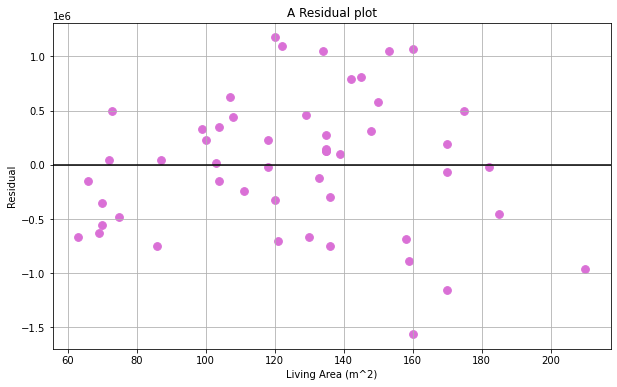

In [ ]:
#Question 1d - residual plot

#creating a list of predicted selling prices
predicted_seling_price = model.predict(x[:, np.newaxis])

#Residual = y(i) - k*x(i)+m (k*x+m for every x value = predicted_seling_price)
Residual = y-predicted_seling_price

#plotting the residual plot
plt.figure(figsize=(10, 6))
plt.scatter(x, Residual, s=60 , color='orchid')
plt.axhline(0,color='black')
plt.title('A Residual plot')
plt.xlabel('Living Area (m^2)')
plt.ylabel('Residual')
plt.grid('true')
plt.show()


### Answer d)

Answer d) See figure

### Answer e)

Answer e)

- Results: The residual plot seems to be balanced, we can see that we have a pretty equal/even distribution around the x-axis (on the positive and negative y-side). We can notice that we do not have many data points on the regression line, however, the distance between the data points and the regression line is not that big, which is positive as our predictions won't be too far from the reality. So we would conclude that we have generated a model that is good enough.

- More variables could have been included from the data, such as rooms, landsize and age. E.g. it's intuitive that the a variable like landsize also has a respectable monetary worth. So it would be irrational to assume that two houses with the same living area of 200 m^2 where one of the houses have 0 m^2 land area and the other 300 m^2 would be worth the same, given that all other parameters are the same. The age of the house is also important, some want an old house but we would for example prefer a new house without wear and tear and would be willing to pay more for that. In conclusion: we believe that by including the other variables we would have generated a model that is more accurate and reflects the reality better.

- A larger dataset would have been beneficial as it would have improved the models accuracy, for example the outliers will have a greater impact on the accuracy when we have fewer data points as the linear regression line will need to "shift/ rotate" in order to even out the distances. In this argument we assume that we do not have a set proportions of outliers so that the proportion of outliers would have decreased given a larger dataset --> we would have more data points not being outliers that can even out the outliers distance and thus the "shift" of the line won't be as big due to some outliers.

- As discussed at the lectures we could have been using a training set separated from the test set as it is a risk of overfitting the model when using the same training data as the test data, this could have been done by splitting the data set into a smaller portion of test data (1/4) and letting the rest of the data (3/4) be training data. The model right now is based on all our data and and our evaluation of its accuracy (looking at the second plot and the third residual plot) is also based on the same data as the model was trained on which one can assume will result in a higher accuracy than it might have with new data. 

- Lastly, another model could have made an better fit for the data points (a higher accuracy)

## Task 2

Decisions: 

We are gonna print a description of the dataset in order to understand the  content we are dealing with better.

In [ ]:
#Imports
from sklearn.datasets import load_iris
iris = load_iris()
#source of inspiration:https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
print(iris['DESCR'])


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

We could see that we have 50 instances for each class, Setosa (0), Versicolour (1) & Virginica (2) which is good as we can train the model with equal amount of data for each class. We can also see that we have 4 numerical attributes, sepal length and width, and petal length and width which will steer the classification.

### 2a) Use a confusion matrix to evaluate the use of logistic regression to classify the iris data set.

Decisions: 

#1: We are going to split our data to a training- and testing-set in order for us to test how our classification model works with new data and not only the trained data.

#2: We will also stratify to make sure that both the training set and testing set have the same proportion of the classes as in the iris.target set. We choose to take 20% of the 150 instances as training data which equals 30 instances, which means that we will get 10 of each class using stratify. Additionally we added random_state=0, to make sure that the training and test data is the same every execution.

#3: We received a warning "Total number of iterations reached its limit", so we raised it until it was solved. Additionally, we will ignore the Future/Deprecation warnings.

#4: We also chose to use multi_class  = 'ovr' (one-vs-rest) as hinted by Jonah in the lecture!

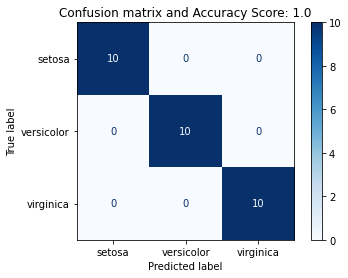

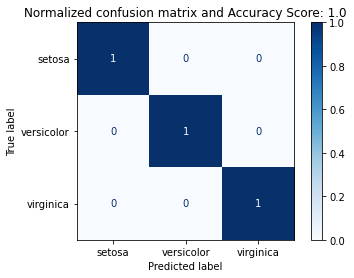

In [ ]:
#Question 2a - Logistic regression and confusion matrix
# Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

#remove the future warning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Splitting the data into training set (80%) and test set (20%).
x_train, x_test, y_train, y_test = train_test_split(
    iris.data,
    iris.target,
    test_size=0.2,
    random_state=0,
    stratify=iris.target,
)

#Creating our logistic regression model
lr_model = LogisticRegression(multi_class='ovr',max_iter=110)

#train the model on the training sets provided
lr_model.fit(x_train, y_train)

# the accuracy
accuracy = lr_model.score(x_test, y_test)

# source of inspiration lecture slide
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
# and this
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html


#Plot both a non-normalized and normalized model, choosed based on their titles
titles = [
    ('Confusion matrix and Accuracy Score: {0}'.format(accuracy), None),
    ('Normalized confusion matrix and Accuracy Score: {0}'.format(accuracy), "true"),
]
for title, normalize in titles:
    display = plot_confusion_matrix(
        lr_model,
        x_test,
        y_test,
        cmap=plt.cm.Blues,
        display_labels=iris['target_names'], #instead of 0,1,2
        normalize=normalize,)
    display.ax_.set_title(title)
plt.show()


Answer a) It seems like our trained logistic regression model is good at identifying the type of the iris flower based on the 4 numeric attributes in the test data, as the accuracy score is 1.0 (100%).  However, we believe that we do not have enough data to state that this model always is a 100% accurate and we believe that more data could have led to an accuracy-level slightly below 100% as we should expect some exceptions.

2b) Use k-nearest neighbours to classify the iris data set with some different values for k, and with uniform and distance-based weights. What will happen when k grows larger for the different cases? Why? 

Decisions: 

#1: We think that a plot of how the accuracy changes for different K-values is provides a good visualisation to answer the question

#2: We could have plotted 2b and 2c directly, as we just could have included plot_confusion_matrix (as above) in the loop below. However this would make us print the all the confusion matrixes first which then should be followed by the answer to 2c before 2b. Additionally, the result became very long so we will instead repeat the same code later. 

#3: The plot would have looked nicer using range(1,121), instead of jumping 20 values, however in 2c, we were asked to use the same settings and therefore we used range(1,121,20).

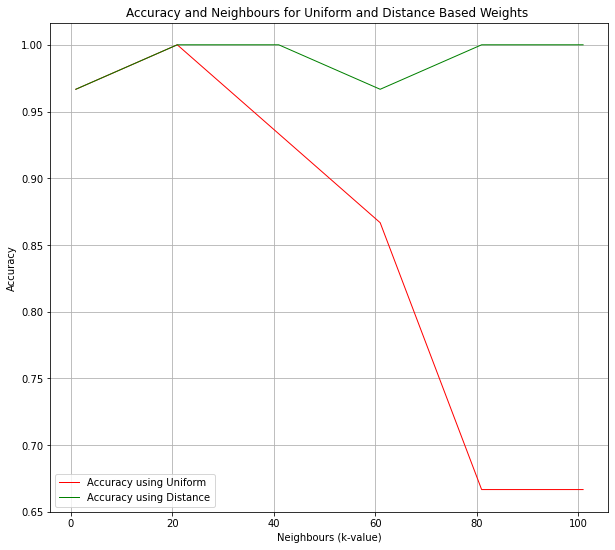

In [ ]:
#Question 2b)
#Imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#create an empty array that will save the accuracy for the different cases
AccuracyScoreUniform = []
AccuracyScoreDistance = []

#For each k value (1, 21, 41, 61, 81, 101) 
for k_value in range(1,121,20):
    #Creating a K-nearest neighbor model with the given K value and weights
    knn =  KNeighborsClassifier(n_neighbors=k_value,weights='uniform')
    #train the model
    knn.fit(x_train, y_train)
    #predict the y values based on the test data
    y_pred = knn.predict(x_test)
    #calculate the accuracy and add it to our array
    AccuracyScoreUniform.append(metrics.accuracy_score(y_test, y_pred)) #for task 2b

for k_value in range(1,121,20):
    #Creating a K-nearest neighbor model with the given K value and weights
    knn =  KNeighborsClassifier(n_neighbors=k_value,weights='distance')
    #train the model
    knn.fit(x_train, y_train)
    #predict the y values based on the test data
    y_pred = knn.predict(x_test)
    #calculate the accuracy and add it to our array
    AccuracyScoreDistance.append(metrics.accuracy_score(y_test, y_pred)) #for task 2b

#setting the x-axis values for the plot, need to be same as the k-values above
interval = range(1,121,20)

#plotting how the accuracy has changed for the different K-values using uniform-, and distance-based weights
plt.figure(figsize=(10,9))
plt.plot(interval, AccuracyScoreUniform, c = 'red', linewidth = 1, label = 'Accuracy using Uniform')
plt.plot(interval, AccuracyScoreDistance, c = 'green', linewidth = 1, label = 'Accuracy using Distance')
plt.grid(True)
plt.title('Accuracy and Neighbours for Uniform and Distance Based Weights ')
plt.xlabel('Neighbours (k-value)')
plt.ylabel('Accuracy')
plt.legend(loc ='lower left') #needed to be able to separate the two lines
plt.show()




plt.show()

Answer 2b) Worth to emphasize is that we can't see what happens between the values  (1,21,41,61,81,101). In order to not miss anything, we would have needed to plot for each x-value (k-value). So, for us to make a correct analysis, we will analyze this plot from a bigger perspective and not dig deeper into on which exact k-value the decrease/increase of accuracy happens at. 

When using the k-nearest neighbour algorithm with uniform weights, we can identify a decrease of the accuracy somewhere between the k-values [20,40] and after that it keeps on decreasing until it reaches somewhere around k=81 where we can see a stagnation. To conclude, when the k-value grows larger, the accuracy decreases somewhere after k=21. For small values [0,21], the accuracy is almost at a 100% all the time. Why is it like this?  

Its pretty intuitive, if K is the nearest data points and we can assume that the data points for the different classes of flowers are pretty clustered and not totally mixed, then as long as K is small relatively to the number of instances of each class, the k nearest neighbour will mostly be of the same class and the probability to be correct is very high. However, as K becomes bigger it will encompass more of the other classes and their probability of being chosen will increase, and the probability to choose the correct class will decrease. So if K=120, in this case (as the number of instances in our training data), the probability for each flower will be 1/3 as we have 40 instance of each class, all will be the nearest neighbour --> 40/120

In contrast, when using the k-nearest neighbour algoritm with distance related weights we can see that the accuracy is pretty stable and is almost a 100% percent the whole time. Why? Even if K increases here, the algoritm weight those with a shorter distance so they have a greater influence. Therefore the probability of choosing the right class does not decrease as much as in the case of uniform  weights when K gets larger, given that they aren't totally mixed. Even if you encompass the whole data set, the weights will make sure that the right class has a higher influence in  as they have a shorter distans in total.

2c) Compare the classification models for the iris data set that are generated by k-nearest neighbours (for the different settings from question 2b) and by logistic regression. Calculate confusion matrices for these models and discuss the performance of the various models. 

Decisions: 

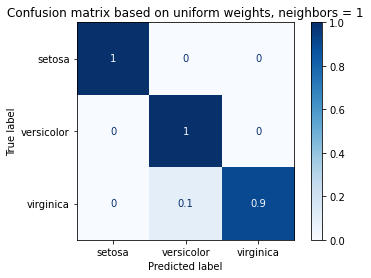

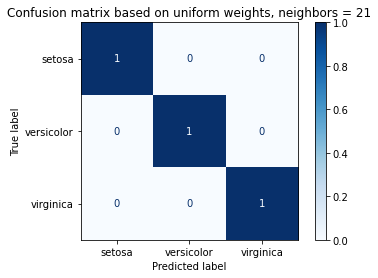

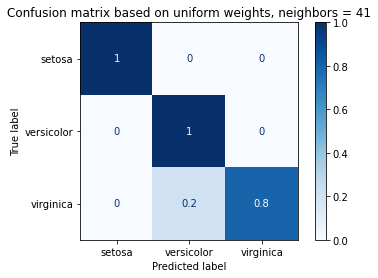

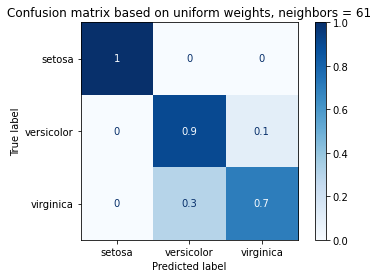

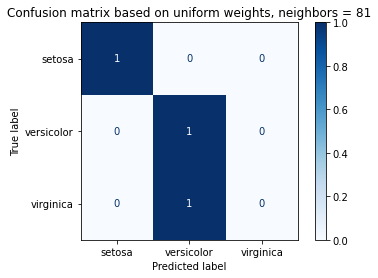

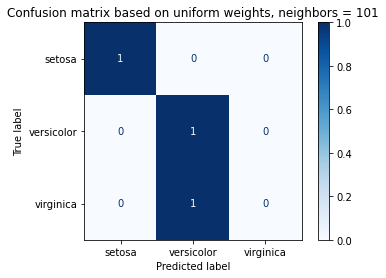

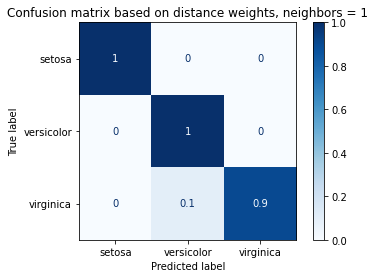

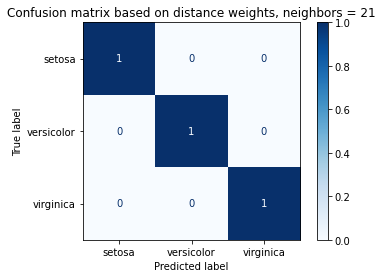

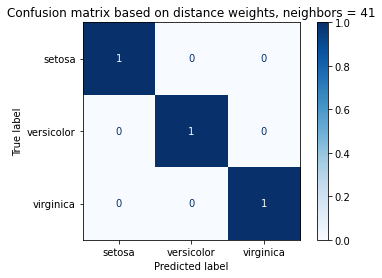

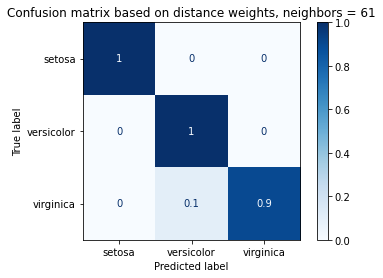

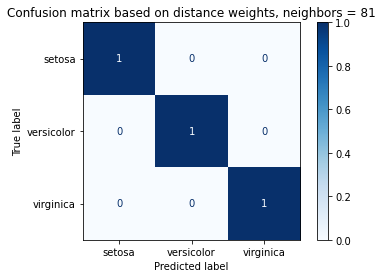

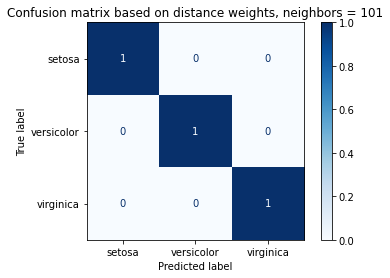

In [ ]:
#Question 2c - K-closest neighbors VS Logistic regression)
#Imports
from sklearn.neighbors import KNeighborsClassifier


#For each k value (1, 21, 41, 61, 81, 101) 
for k_value in range(1,121,20):
    #Creating a K-nearest neighbor model with the given K value and weights
    knn =  KNeighborsClassifier(weights='uniform',n_neighbors=k_value)
      #train the model
    knn.fit(x_train, y_train)
    display = plot_confusion_matrix( 
        knn,
        x_test,
        y_test,
        cmap=plt.cm.Blues,
        display_labels=iris['target_names'], #instead of 0,1,2
        normalize='true',)
    display.ax_.set_title(f'Confusion matrix based on uniform weights, neighbors = {k_value}')
plt.show()

for k_value in range(1,121,20):
    #Creating a K-nearest neighbor model with the given K value and weights
    knn =  KNeighborsClassifier(weights='distance',n_neighbors=k_value)
    #train the model
    knn.fit(x_train, y_train)
    display = plot_confusion_matrix( 
        knn,
        x_test,
        y_test,
        cmap=plt.cm.Blues,
        display_labels=iris['target_names'], #instead of 0,1,2
        normalize='true',)
    display.ax_.set_title(f'Confusion matrix based on distance weights, neighbors = {k_value}')

plt.show()



Answer 2c) By looking at these confusion matrixes we can draw the same conclusions as in 2b, when using uniform weights model was only 100% accurate once when k=21. In contrast, using distance based weights we was 100% accurate 4/6 times (k=21,41,81,101).

In comparison, the logistic regression algoritm worked better on this data as its accuracy was 100% the whole time. To use the k-nearest neighbor algorithm we needed to plot the "different levels of accuracy" we received for different values of K and go with the K value that provided the highest accuracy to perform as well as the logistic regression. However, with other data the logistic regression algoritm may not be a 100% correct at the first try, and then using KNN could have been a better option. To conclude: in this case the logistic regression perform better but in other cases with other data sets, KNN could be better.

## Task 3

3. Explain why it is important to use a separate test (and sometimes validation) set. [1.5p] 

Answer 3)

It's important because it's easy to overfit the model for the specific data it is trained on. If we don't split our data we can only know our model's performance on that specific data that has been used to build it. This can be compared to the model only memoizing the training data, but not actually learning how to predict something new. If we instead spare some data for a later testing we can make sure that the performance not has been influenced in the same way. So in conclusion, the model at hand can be made more resilient against overfitting this way.  

However, by dividing our total accessible data into 3 different sets of training, validation, and test data we can use data splitting to increase the speed and quality with which we build models. 

First set use - The initial training set is used for the sole purpose of training. Any testing on this data after having optimised a model to fit it is rather dumb since you will always get a as good of a result as adapted your model to the data. During this phase we can build several different models, both with respect to model families but also to individual algoritms for the same type of model.

Second set use - The validation set is then used for enhancing that process and trimming of the parameters in our model to better predict the test data. I.e. the goal is to rank the models for selection and give their performance in accuracy and other measurements. Also, it contributes by letting the developer know when to stop, when the model has reached it best performance on the validation set. There is a name for this process, it's called early stopping. 

Third set use - Lastly, we expose our final model to some again new data. The aim is to make sure that the model has not been influenced, or particularly built for predicting the very data points that its performance later is tested with. Equally as important as for the second set, also this portion of the set needs to be representative of the set as a whole. By randomising the data for each set this should however not be a problem, assuming a larger amount of data.

Sources: 

https://blog.roboflow.com/train-test-split/

https://www.techtarget.com/searchenterpriseai/definition/data-splitting

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=85ae1618-9b9c-4671-808b-a0cb8ea95e84' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>